<a href="https://colab.research.google.com/github/Jeeva55t/SuperVisedMachineLearning/blob/main/SupportVectorClassifier-WeatherAUS-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('weatherAUS.csv')

In [6]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,507
MaxTemp,376
Rainfall,1184
Evaporation,20720
Sunshine,26015
WindGustDir,5104
WindGustSpeed,5099
WindDir9am,4696


<Axes: >

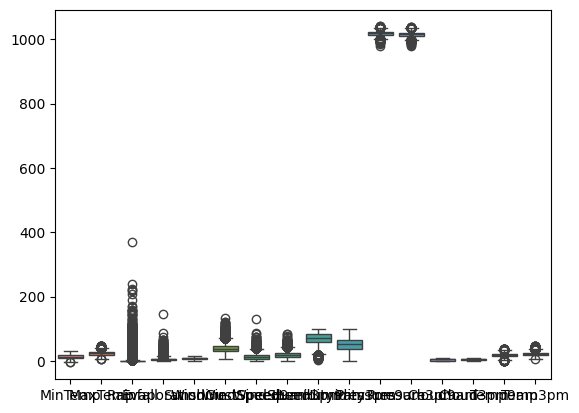

In [7]:
sns.boxplot(df)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
      df[col] =le.fit_transform(df[col])

In [9]:
for col in df:
  df[col] = df[col].fillna(df[col].mean())


In [10]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [11]:
from scipy.stats import zscore
# for col in df.columns:
#   df[col] = zscore(df[col])

for col in df:
  z_score =zscore(df[col])
  df[np.abs(z_score) > 2.5]


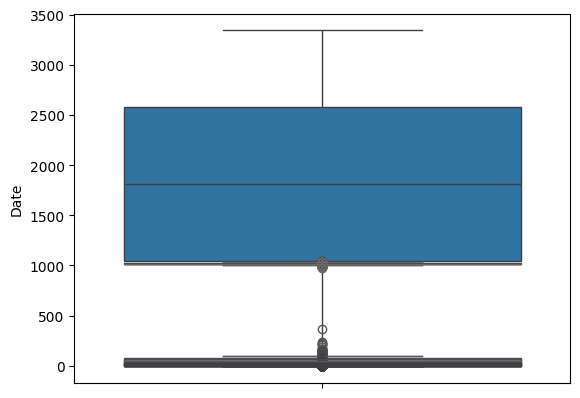

In [12]:
for col in df.columns:
  sns.boxplot(df[col])

In [13]:
from sklearn.model_selection import train_test_split
x = df.drop('RainTomorrow',axis=1)
y = df['RainTomorrow']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [14]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

SVC()

In [15]:
y_pred = model.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test,y_pred)
print(accuracy_score)

0.7460114126004426
